# **Project 14: Heart Attack Risk Predictor**

***NumPy*** : *A library for numerical computations in Python, providing support for arrays and matrices.*

***Pandas*** : *A data manipulation and analysis library in Python, offering data structures like DataFrames.*

***Matplotlib*** : *A plotting library in Python used for creating static, animated, and interactive visualizations.*

***Seaborn*** : *A statistical data visualization library in Python built on top of Matplotlib, offering attractive and informative graphics.*

***Warnings*** : *A module in Python to manage warning messages, allowing them to be displayed, ignored, or handled differently.*

# **Data Loading**

**We are importing these libraries for Data Loading, Data Cleaning, and Data Visualization.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
%matplotlib inline

**Suppresses all warning messages in the current Python session.**

In [ ]:
warnings.filterwarnings("ignore")

**Reads a CSV file into a DataFrame and displays the first five rows.**

In [ ]:
df = pd.read_csv("/content/Heart.csv")
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Removes the 'oldpeak', 'slp', and 'thall' columns from the DataFrame.**

In [ ]:
df = df.drop(['oldpeak','slp','thall'],axis=1)

# **Data Cleaning**

**Displays the count of missing values in each column of the DataFrame.**

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
output      0
dtype: int64

**Provides a summary of the DataFrame, including the index dtype, column dtypes, non-null values, and memory usage.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trtbps    303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalachh  303 non-null    int64
 8   exng      303 non-null    int64
 9   caa       303 non-null    int64
 10  output    303 non-null    int64
dtypes: int64(11)
memory usage: 26.2 KB


**Returns the dimensions of the DataFrame as a tuple, indicating the number of rows and columns.**

In [ ]:
df.shape

(303, 11)

# **Data Visualization**

**Creates a heatmap to visualize the correlation matrix of the DataFrame's features using Seaborn.**

<Axes: >

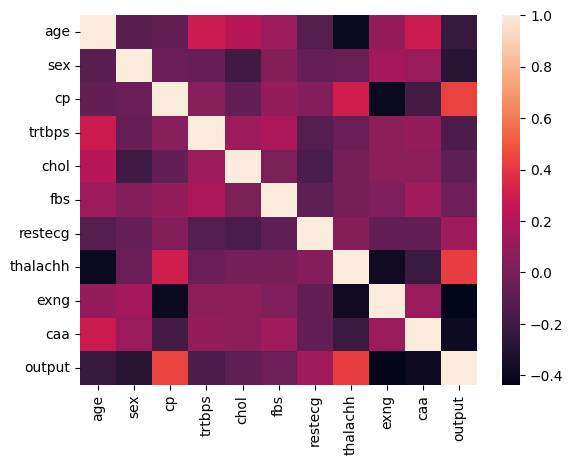

In [ ]:
sns.heatmap(df.corr())

**Creates a count plot showing the distribution of patient ages, colored by age category, using Matplotlib and Seaborn for visualization.**

**Here, we determine the number of individuals aged 29 to 77 years old and obtain the count of people within each age bracket.**

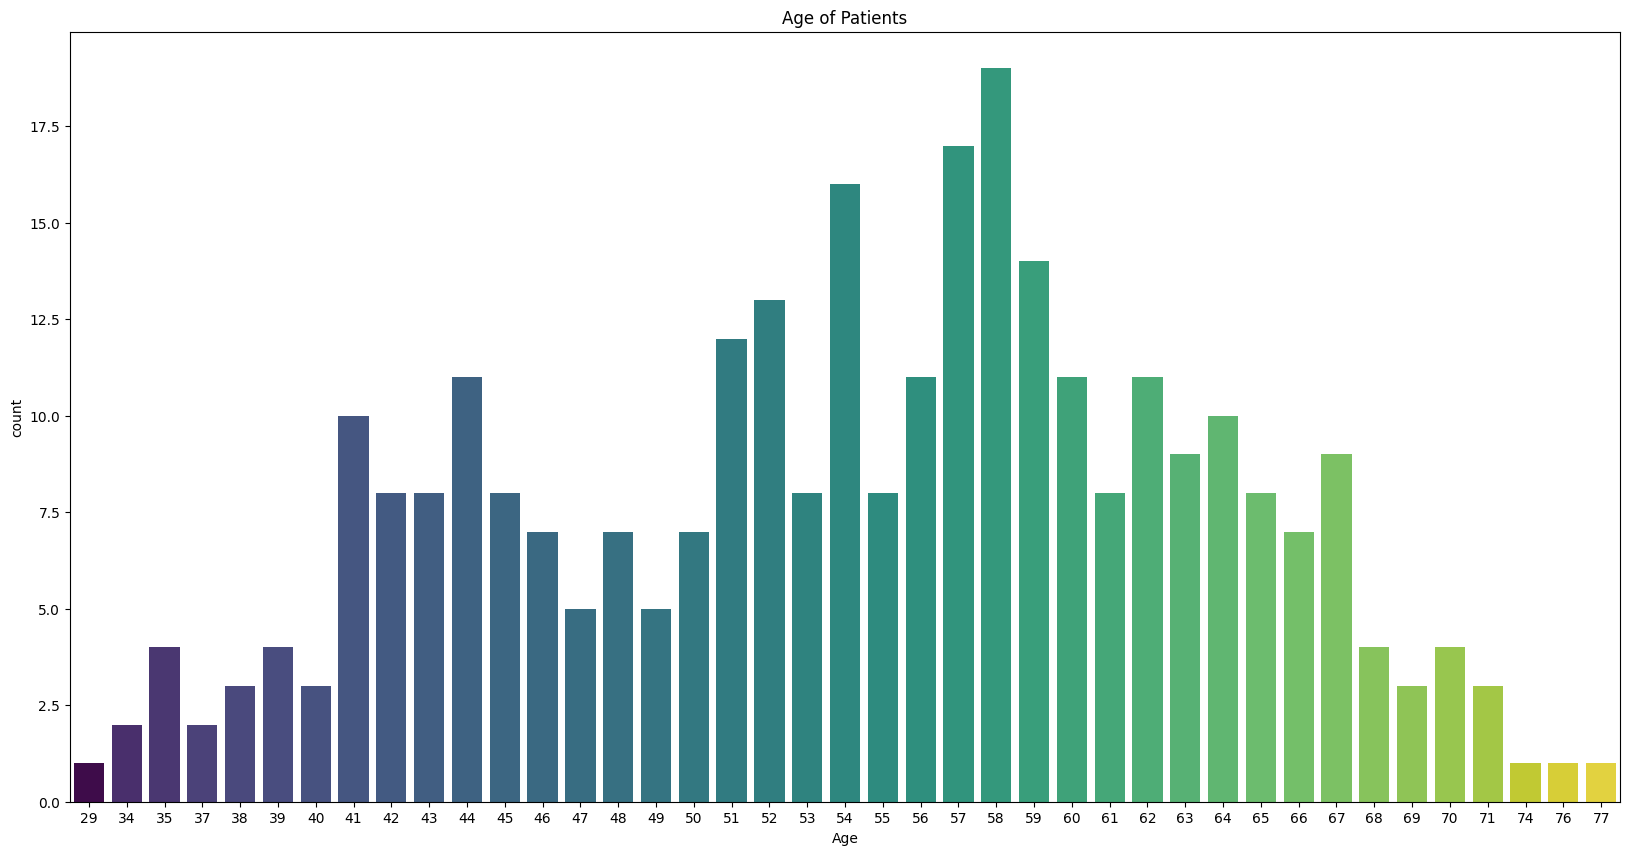

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x='age', data=df, hue='age', palette='viridis', legend=False)
plt.show()

**Creates a count plot displaying the distribution of patient sexes (0 = Female, 1 = Male), using Matplotlib and Seaborn for visualization.**

**Here, we represent the number of females and males in our database using binary encoding: '0' denotes females and '1' denotes males.**

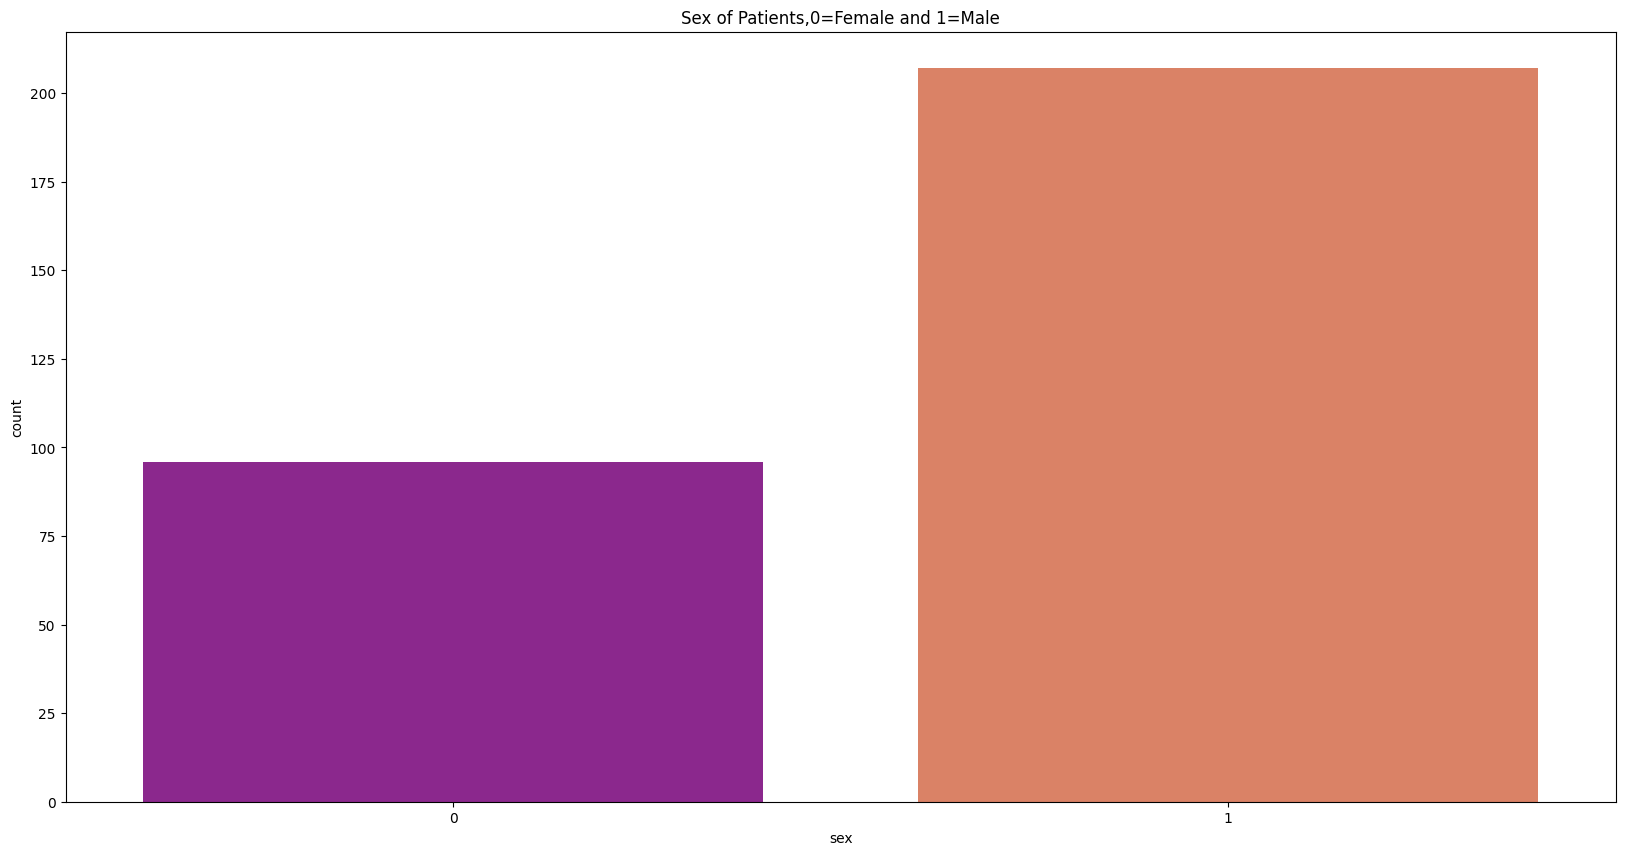

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Sex of Patients,0=Female and 1=Male")
sns.countplot(x='sex',data=df, palette='plasma', hue="sex", legend=False)
plt.show()

**Creates a figure with two subplots, where the first subplot displays a histogram of resting blood pressure values ("trtbps") with a KDE plot overlaid, using Seaborn for visualization.**

**This displays the count of blood pressure measurements.**

Text(0.5, 0, 'Resting Blood Pressure (mmHg)')

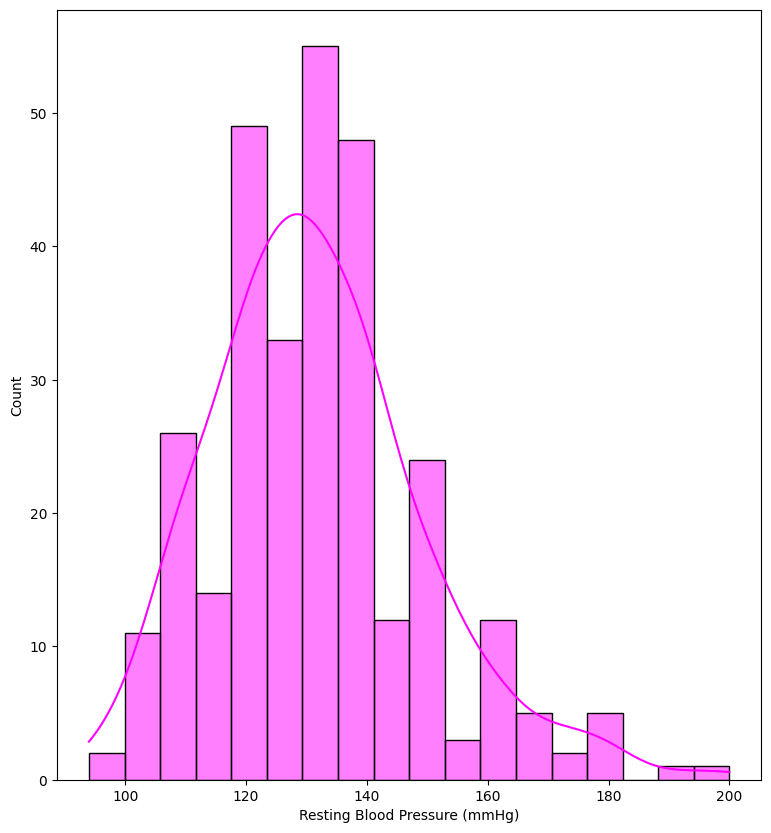

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(df['trtbps'], kde=True, color = 'magenta')
plt.xlabel("Resting Blood Pressure (mmHg)")

**Creates a figure with two subplots, where the second subplot displays a histogram of maximum heart rate achieved ("thalachh") with a KDE plot overlaid, using Seaborn for visualization.**

**This graph illustrates the maximum heart rate achieved, categorized by the number of individuals.**

Text(0.5, 0, 'Maximum Heart Rate Achieved (bpm)')

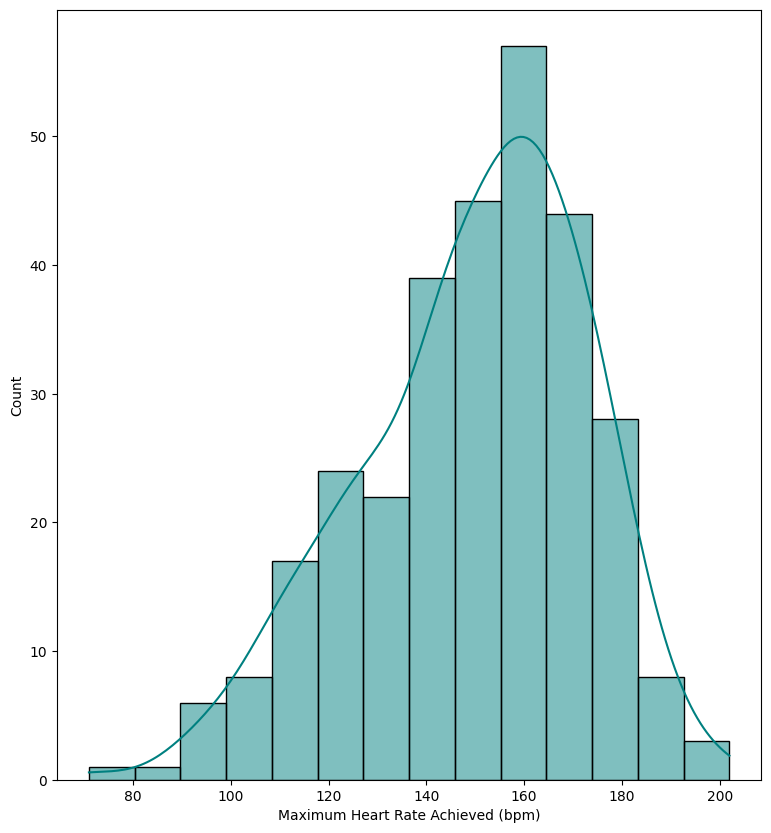

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,2)
sns.histplot(df['thalachh'], kde=True, color = 'teal')
plt.xlabel("Maximum Heart Rate Achieved (bpm)")

**Creates a histogram with a KDE plot overlaid for the 'chol' (cholesterol) column in the DataFrame, using Seaborn for visualization.**

**This displays the count of cholesterol levels.**

Text(0.5, 0, 'Cholestrol')

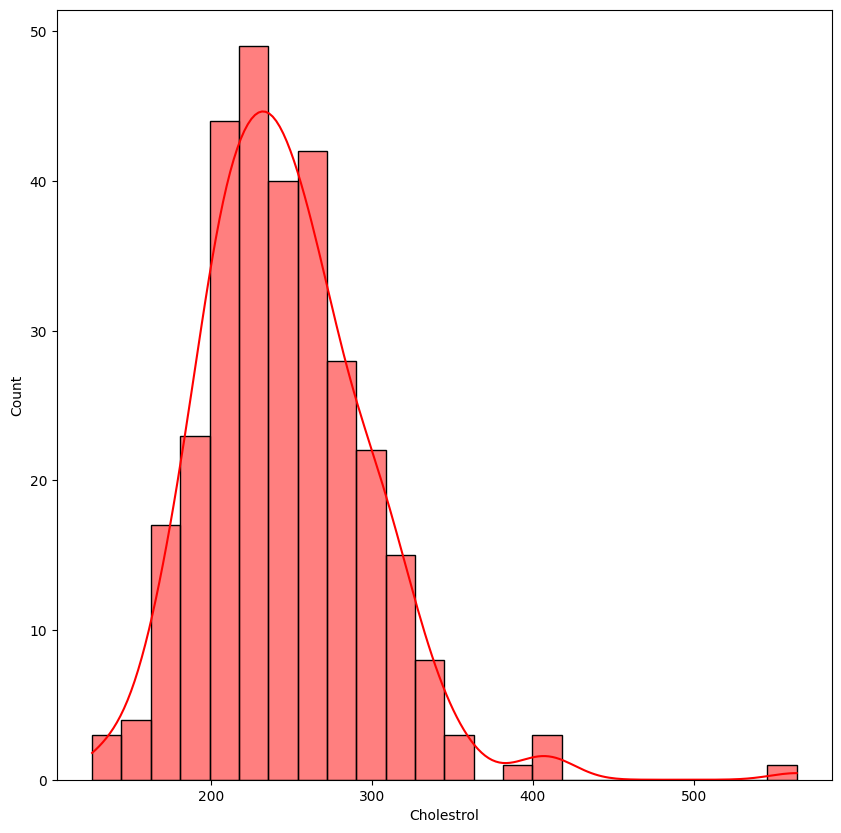

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(df['chol'], kde=True, color = 'red')
plt.xlabel("Cholestrol")

**Displays the first five rows of the DataFrame "df".**

In [ ]:
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


**Returns a list of column names in the DataFrame "df".**

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'caa', 'output'],
      dtype='object')

**The code df.to_csv("traineddata", index=False) saves the DataFrame df to a CSV file named "traineddata" without writing row indices.**

In [ ]:
df.to_csv("traineddata", index=False)

# **Model Building**

**Imports the "train_test_split" function from "sklearn.model_selection" for splitting datasets and "mean_squared_error" from "sklearn.metrics" for evaluating regression models.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

**Defines "X" as a DataFrame containing selected columns ('age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'caa') from "df", and "y" as a DataFrame containing the 'output' column from "df".**

In [ ]:
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'caa']]

y = df[['output']]

**Splits the data into training and testing sets ("X_train", "X_test" for features and "y_train", "y_test" for target) using a test size of 20% ("test_size=0.2") with "train_test_split" from "sklearn.model_selection".**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Scaled_X = MinMaxScaler().set_output(transform = "pandas"): This line attempts to initialize a MinMaxScaler object with an option to set the output format to pandas DataFrame after transformation, but this specific method is not part of "MinMaxScaler" as per standard usage.**

**Scaled_X = Scaled_X.fit_transform(X): Fits the initialized MinMaxScaler object "Scaled_X" to the feature data "X" and transforms "X" to a scaled version based on the fit.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Scaled_X = MinMaxScaler().set_output(transform = "pandas")

Scaled_X = Scaled_X.fit_transform(X)

Scaled_Y = MinMaxScaler().set_output(transform = "pandas")

Scaled_Y = Scaled_Y.fit_transform(y)

**1: Logistic Regression Import: Imports logistic regression from sklearn.linear_model.**

**2: LogReg Initialization: Initializes a logistic regression model (LogReg) with parameters C=1.0 and solver='lbfgs'.**

**3: Model Training: Fits LogReg using X_train and y_train to learn from the training data.**

**4: The code generates a classification report for the Logistic Regression comparing the true labels (y_test) with the predicted labels (y_pred).**

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(C=1.0, solver='lbfgs')

LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)

CR = classification_report(y_test, y_pred)
print("Logistic Regression Cassification Report: ")
print("")
print(CR)

Logistic Regression Cassification Report: 

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        31
           1       0.74      0.83      0.78        30

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



**1: Random Forest Import: Imports the RandomForestClassifier from sklearn.ensemble, used for ensemble learning with decision trees.**

**2: RFC Initialization: Initializes a Random Forest Classifier (RFC) with n_estimators=100 (number of trees) and max_depth=10 (maximum depth of each tree).**

**3: Model Training: Fits (fit) the RFC model (RFC) using the training data (X_train and y_train).**

**4: The code generates a classification report for the Random Forest Classifier, comparing the true labels (y_test) with the predicted labels (y_pred).**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=100, max_depth=10)

RFC.fit(X_train, y_train)

y_pred = RFC.predict(X_test)

CR = classification_report(y_test, y_pred)
print("Random Forest Classifer Cassification Report: ")
print("")
print(CR)

Random Forest Classifer Cassification Report: 

              precision    recall  f1-score   support

           0       0.86      0.77      0.81        31
           1       0.79      0.87      0.83        30

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



**1: Decision Tree Import: Imports the DecisionTreeClassifier from sklearn.tree, used for decision tree-based classification.**

**2: DTC Initialization: Initializes a Decision Tree Classifier (DTC) with max_depth=5 (maximum depth of the tree) and min_samples_split=2 (minimum number of samples required to split an internal node).**

**3: Model Training: Fits (fit) the DTC model (DTC) using the training data (X_train and y_train).**

**4: The code generates a classification report for the Decision Tree Classifier, comparing the true labels (y_test) with the predicted labels (y_pred).**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(max_depth=5, min_samples_split=2)
DTC.fit(X_train, y_train)

y_pred = DTC.predict(X_test)

CR = classification_report(y_test, y_pred)
print("Decision Tree Classifer Cassification Report: ")
print("")
print(CR)

Decision Tree Classifer Cassification Report: 

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        31
           1       0.78      0.83      0.81        30

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



# **Conclusion:**

**Based on the updated classification reports, we can conclude that the Random Forest Classifier (RFC) performs the best among the three models evaluated: Logistic Regression, Random Forest Classifier, and Decision Tree Classifier.**

**Here are the precision scores for each model:**

- **Logistic Regression (LogReg)**:
  - **Class 0: Precision = 0.81**
  - **Class 1: Precision = 0.74**

- **Random Forest Classifier (RFC)**:
  - **Class 0: Precision = 0.86**
  - **Class 1: Precision = 0.79**

- **Decision Tree Classifier (DTC)**:
  - **Class 0: Precision = 0.83**
  - **Class 1: Precision = 0.78**

**The Random Forest Classifier has the highest precision for both classes (0 and 1), indicating it is the most accurate in predicting both classes compared to the other two models. Therefore, we choose the Random Forest Classifier as our prediction model due to its superior precision performance.**

**Next steps would include saving the Random Forest model for future predictions.**

# **Saving The Model**

**After executing this code, you'll have a file named "Finalized-Model.pickle" containing the serialized Random Forest model (RFC). You can later load this saved model using pickle.load() to make predictions without retraining the model from scratch.**

In [ ]:
import pickle

with open("Finalized-Model.pickle", "wb") as file:
  pickle.dump(RFC, file)